<a href="https://colab.research.google.com/github/Fahim19010320/signal-quality-assessment-by-residual-recurrent-based-deep-learning-method/blob/main/Cat_v_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-vs-cats.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train' ,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

#Generators
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test' ,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process (image,label):
  image = tf.cast(image/256. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# creat CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))   #32-filter no #kernelsize=filtersize
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))      #stride= moving no.

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))





In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_9 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_10 (Bat  (None, 125, 125, 64)     256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)        #epochs=iteration

Epoch 1/10
625/625 [==============================] - 72s 107ms/step - loss: 1.3147 - accuracy: 0.5551 - val_loss: 0.6585 - val_accuracy: 0.6094
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.6725 - accuracy: 0.5802 - val_loss: 0.8230 - val_accuracy: 0.6208
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6319 - accuracy: 0.6169 - val_loss: 0.6652 - val_accuracy: 0.5818
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5528 - accuracy: 0.6917 - val_loss: 0.5529 - val_accuracy: 0.6868
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4717 - accuracy: 0.7623 - val_loss: 0.4598 - val_accuracy: 0.7832
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4056 - accuracy: 0.8018 - val_loss: 0.5118 - val_accuracy: 0.7684
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3559 - accuracy: 0.8294 - val_loss: 0.4787 - val_ac

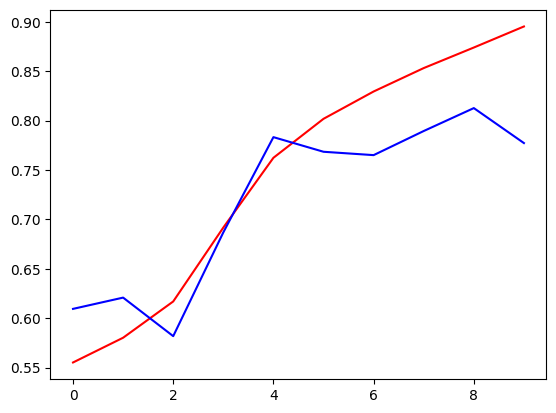

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation')
plt.show()

In [ ]:
#ways to reduce overfitting

# add more data
# data augmentation
# L1/L2 Regularizer
# Dropout
# Batch norm
# reduce complexity